# Data Preparation


In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score,
                             confusion_matrix, classification_report)
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns







In [96]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

column_names = [
    'Class', 'handicapped-infants', 'water-project-cost-sharing',
    'adoption-of-the-budget-resolution', 'physician-fee-freeze',
    'el-salvador-aid', 'religious-groups-in-schools',
    'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
    'mx-missile', 'immigration', 'synfuels-corporation-cutback',
    'education-spending', 'superfund-right-to-sue', 'crime',
    'duty-free-exports', 'export-administration-act-south-africa'
]
data = pd.read_csv(url, names=column_names)

In [97]:
# Replace '?' with the most frequent vote per column
for col in data.columns[1:]:  # Skip the 'Class' column
    most_frequent = data[col].mode()[0]  # Get the most frequent vote (y/n)
    data[col] = data[col].replace('?', most_frequent)

In [98]:
# Encode votes: 'y' → 1, 'n' → 0
vote_mapping = {'y': 1, 'n': 0}
for col in data.columns[1:]:
    data[col] = data[col].map(vote_mapping)

# Encode target variable: 'democrat' → 0, 'republican' → 1
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])  # Democrat:0, Republican:1

# Check for any remaining non-binary values
assert data.drop('Class', axis=1).isin([0, 1]).all().all(), "Non-binary value found in features"
# To verify no missing values remain:
assert data.isna().sum().sum() == 0, "There are still missing values in the data"

In [99]:
# Separate features (X) and target (y)
X = data.drop('Class', axis=1).values
y = data['Class'].values

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [100]:
# Print dataset details
print("Dataset shape:", data.shape)
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
print("\nSample preprocessed data (first 5 rows):")
print(data.head())


Dataset shape: (435, 17)
Training set: (348, 16) (348,)
Testing set: (87, 16) (87,)

Sample preprocessed data (first 5 rows):
   Class  handicapped-infants  water-project-cost-sharing  \
0      1                    0                           1   
1      1                    0                           1   
2      0                    0                           1   
3      0                    0                           1   
4      0                    1                           1   

   adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
0                                  0                     1                1   
1                                  0                     1                1   
2                                  1                     0                1   
3                                  1                     0                1   
4                                  1                     0                1   

   religious-groups-in-schools  

# ANN Implementation from scratch



=== Training with 10 Hidden Neurons ===
Loss components - y_pred range: [0.329802, 0.974121], loss: 0.904576
Epoch 0: Loss = 0.9046, Accuracy = 0.4052
Loss components - y_pred range: [0.256686, 0.950629], loss: 0.836593
Loss components - y_pred range: [0.175970, 0.918722], loss: 0.803097
Loss components - y_pred range: [0.125781, 0.900136], loss: 0.790209
Loss components - y_pred range: [0.093303, 0.886724], loss: 0.788505
Loss components - y_pred range: [0.071531, 0.874119], loss: 0.793815
Loss components - y_pred range: [0.056297, 0.862280], loss: 0.803159
Loss components - y_pred range: [0.046516, 0.851154], loss: 0.815280
Loss components - y_pred range: [0.038980, 0.840702], loss: 0.829382
Loss components - y_pred range: [0.033013, 0.830848], loss: 0.844368
Loss components - y_pred range: [0.028208, 0.838552], loss: 0.860084
Loss components - y_pred range: [0.024283, 0.847044], loss: 0.876420
Loss components - y_pred range: [0.021045, 0.854848], loss: 0.893198
Loss components - y_

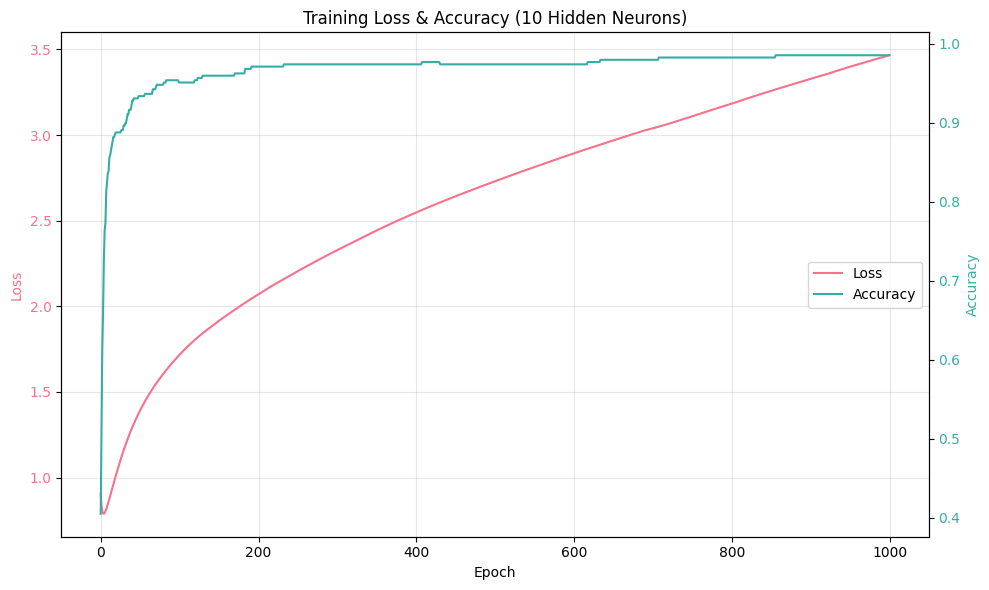


Test Metrics:
Accuracy: 0.9540
Precision: 0.9655
Recall: 0.9032
F1 Score: 0.9333


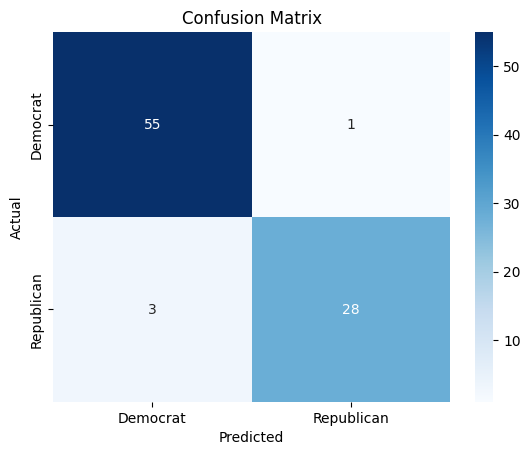


=== Training with 20 Hidden Neurons ===
Loss components - y_pred range: [0.085438, 0.965982], loss: 0.815128
Epoch 0: Loss = 0.8151, Accuracy = 0.4253
Loss components - y_pred range: [0.064262, 0.959149], loss: 0.789300
Loss components - y_pred range: [0.051901, 0.952513], loss: 0.787282
Loss components - y_pred range: [0.044092, 0.946378], loss: 0.796529
Loss components - y_pred range: [0.038845, 0.940633], loss: 0.810723
Loss components - y_pred range: [0.035139, 0.935239], loss: 0.827024
Loss components - y_pred range: [0.032408, 0.930146], loss: 0.843973
Loss components - y_pred range: [0.030332, 0.925346], loss: 0.861028
Loss components - y_pred range: [0.028708, 0.920784], loss: 0.877732
Loss components - y_pred range: [0.026216, 0.918394], loss: 0.894041
Loss components - y_pred range: [0.023520, 0.917695], loss: 0.909837
Loss components - y_pred range: [0.020899, 0.917106], loss: 0.925242
Loss components - y_pred range: [0.018736, 0.916607], loss: 0.940162
Loss components - y_

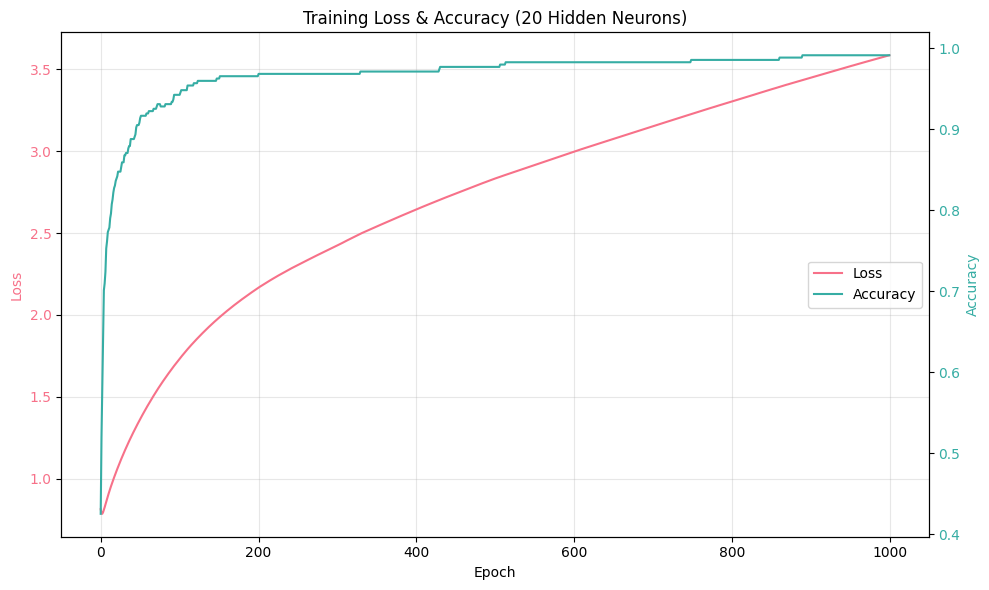


Test Metrics:
Accuracy: 0.9425
Precision: 0.9643
Recall: 0.8710
F1 Score: 0.9153


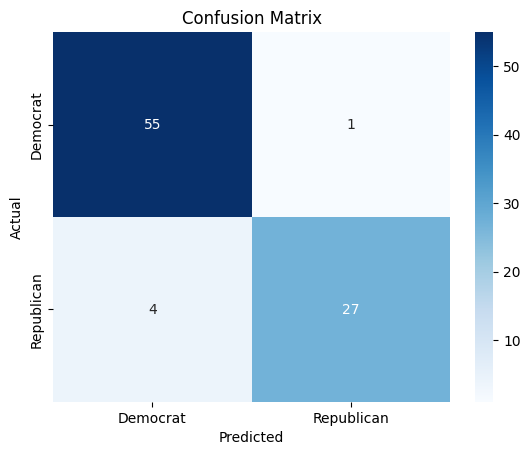


=== Training with 30 Hidden Neurons ===
Loss components - y_pred range: [0.068508, 0.770735], loss: 0.744068
Epoch 0: Loss = 0.7441, Accuracy = 0.7184
Loss components - y_pred range: [0.063483, 0.831594], loss: 0.771883
Loss components - y_pred range: [0.054995, 0.872729], loss: 0.805002
Loss components - y_pred range: [0.045593, 0.901080], loss: 0.838837
Loss components - y_pred range: [0.038307, 0.919982], loss: 0.872294
Loss components - y_pred range: [0.032529, 0.933318], loss: 0.904795
Loss components - y_pred range: [0.027891, 0.943066], loss: 0.935870
Loss components - y_pred range: [0.024169, 0.950328], loss: 0.965231
Loss components - y_pred range: [0.021140, 0.955831], loss: 0.992713
Loss components - y_pred range: [0.018651, 0.960089], loss: 1.018372
Loss components - y_pred range: [0.016593, 0.963440], loss: 1.042258
Loss components - y_pred range: [0.014869, 0.966122], loss: 1.064543
Loss components - y_pred range: [0.013406, 0.968309], loss: 1.085435
Loss components - y_

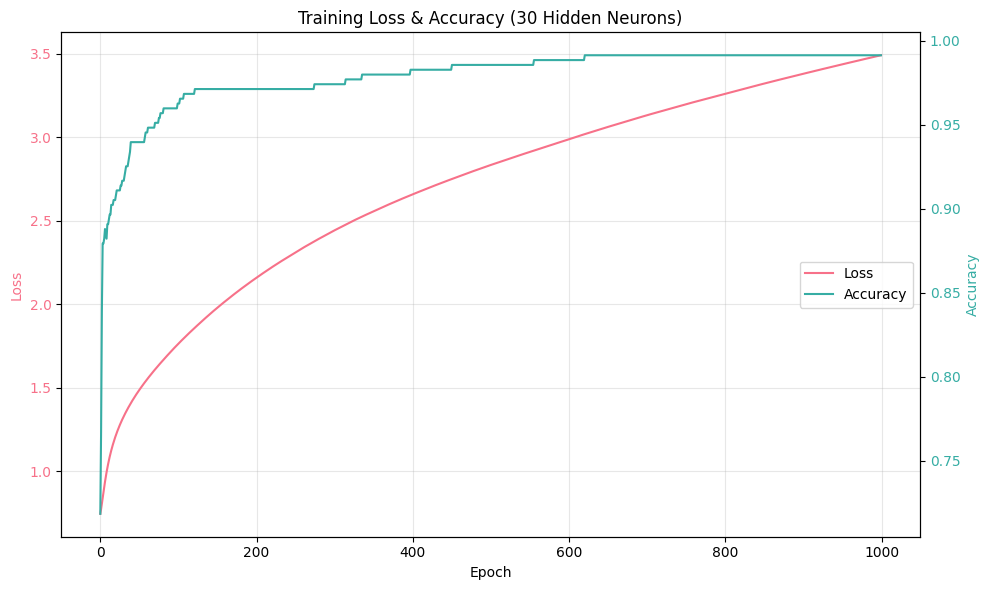


Test Metrics:
Accuracy: 0.9425
Precision: 0.9643
Recall: 0.8710
F1 Score: 0.9153


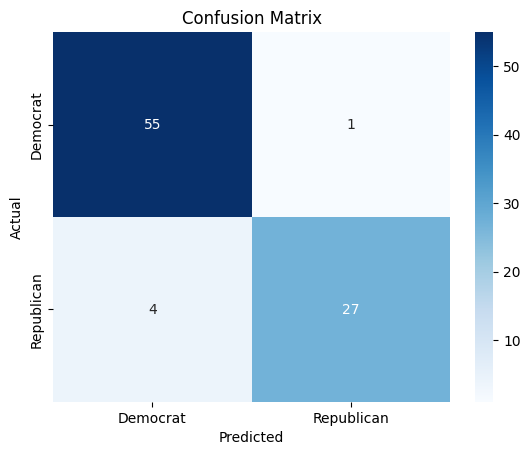


=== Performance Summary ===
Hidden Neurons | Accuracy | Precision | Recall | F1 Score
            10 | 0.9540   | 0.9655    | 0.9032 | 0.9333
            20 | 0.9425   | 0.9643    | 0.8710 | 0.9153
            30 | 0.9425   | 0.9643    | 0.8710 | 0.9153


In [101]:


# ACTIVATION FUNCTIONS


def sigmoid(x):
    """Sigmoid activation function (maps any value to [0,1])"""
    x = np.clip(x, -500, 500)  # Clip inputs to prevent overflow
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    """Derivative of sigmoid function"""
    return output * (1 - output)

def relu(x):
    """ReLU activation function"""
    return np.maximum(0, x)

def relu_derivative(output):
    """Derivative of ReLU function"""
    return (output > 0).astype(float)


# NEURAL NETWORK CORE


def initialize_parameters(input_size, hidden_size, output_size):
    """Initialize weights with Xavier/Glorot initialization"""
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def forward_pass(X, W1, b1, W2, b2):
    """Forward propagation through the network"""
    Z1 = X.dot(W1) + b1
    A1 = relu(Z1)
    Z2 = A1.dot(W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def compute_loss(y_true, y_pred):
    """Binary cross-entropy loss"""
    y_pred = np.clip(y_pred, 1e-8, 1 - 1e-8)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    print(f"Loss components - y_pred range: [{y_pred.min():.6f}, {y_pred.max():.6f}], loss: {loss:.6f}")
    return loss
    #return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

def backward_pass(X, y, Z1, A1, Z2, A2, W2):
    """Backpropagation to compute gradients"""
    m = X.shape[0]
    dZ2 = A2 - y.reshape(-1, 1)
    dW2 = A1.T.dot(dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * relu_derivative(A1)
    dW1 = X.T.dot(dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

# TRAINING & EVALUATION


def train(X, y, hidden_size=10, learning_rate=0.1, epochs=1000):
    """Train the neural network with loss/accuracy tracking"""
    input_size = X.shape[1]
    output_size = 1

    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    history = {'loss': [], 'accuracy': []}

    for epoch in range(epochs):
        # Forward pass
        Z1, A1, Z2, A2 = forward_pass(X, W1, b1, W2, b2)

        # Compute metrics
        loss = compute_loss(y, A2)
        y_pred = (A2 > 0.5).astype(int)
        accuracy = np.mean(y == y_pred.flatten())

        # Record history
        history['loss'].append(loss)
        history['accuracy'].append(accuracy)

        # Backward pass
        dW1, db1, dW2, db2 = backward_pass(X, y, Z1, A1, Z2, A2, W2)

        # Update weights
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

    return W1, b1, W2, b2, history

def predict(X, W1, b1, W2, b2):
    """Make binary predictions"""
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int).flatten()


# VISUALIZATION


def plot_combined_training_history(history, hidden_size):
    """Plot loss and accuracy on the same graph with dual y-axes"""
    plt.figure(figsize=(10, 6))

    # Create color palette
    colors = sns.color_palette("husl", 2)

    # Plot loss on primary y-axis
    ax1 = plt.gca()
    ax1.plot(history['loss'], color=colors[0], label='Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=colors[0])
    ax1.tick_params(axis='y', labelcolor=colors[0])
    ax1.grid(True, alpha=0.3)

    # Create second y-axis for accuracy
    ax2 = ax1.twinx()
    ax2.plot(history['accuracy'], color=colors[1], label='Accuracy')
    ax2.set_ylabel('Accuracy', color=colors[1])
    ax2.tick_params(axis='y', labelcolor=colors[1])

    # Add title and legend
    plt.title(f'Training Loss & Accuracy ({hidden_size} Hidden Neurons)')

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(cm, class_names=['Democrat', 'Republican']):
    """Plot confusion matrix heatmap"""
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


# MAIN EXECUTION


if __name__ == "__main__":


    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Experiment with different architectures
    hidden_sizes = [10, 20, 30]
    results = {}

    for size in hidden_sizes:
        print(f"\n=== Training with {size} Hidden Neurons ===")

        # Train model
        W1, b1, W2, b2, history = train(X_train, y_train, hidden_size=size, epochs=1000)

        # Plot combined training history
        plot_combined_training_history(history, size)

        # Evaluate on test set
        y_pred = predict(X_test, W1, b1, W2, b2)

        # Calculate metrics
        TP = np.sum((y_test == 1) & (y_pred == 1))
        TN = np.sum((y_test == 0) & (y_pred == 0))
        FP = np.sum((y_test == 0) & (y_pred == 1))
        FN = np.sum((y_test == 1) & (y_pred == 0))

        metrics = {
            'accuracy': (TP + TN) / (TP + TN + FP + FN),
            'precision': TP / (TP + FP + 1e-8),
            'recall': TP / (TP + FN + 1e-8),
            'f1_score': 2 * TP / (2 * TP + FP + FN + 1e-8),
            'confusion_matrix': np.array([[TN, FP], [FN, TP]])
        }
        results[size] = metrics

        # Print metrics
        print(f"\nTest Metrics:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1 Score: {metrics['f1_score']:.4f}")

        # Plot confusion matrix
        plot_confusion_matrix(metrics['confusion_matrix'])

    # Final comparison
    print("\n=== Performance Summary ===")
    print("Hidden Neurons | Accuracy | Precision | Recall | F1 Score")
    for size in hidden_sizes:
        m = results[size]
        print(f"{size:14} | {m['accuracy']:.4f}   | {m['precision']:.4f}    | {m['recall']:.4f} | {m['f1_score']:.4f}")

# ANN Implementation with Libraries

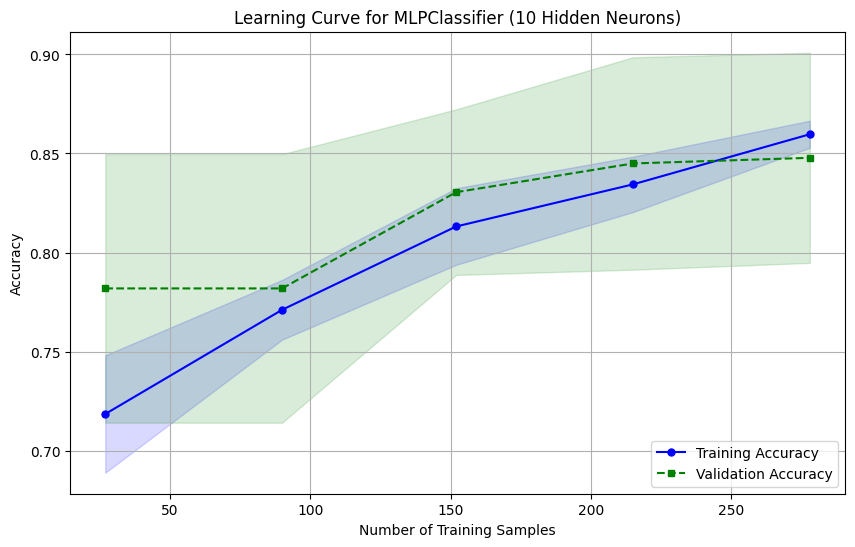


                 MODEL PERFORMANCE METRICS                  
Accuracy:      0.8391
Precision:     0.7297
Recall:        0.8710
F1-Score:      0.7941

              precision    recall  f1-score   support

    Democrat       0.92      0.82      0.87        56
  Republican       0.73      0.87      0.79        31

    accuracy                           0.84        87
   macro avg       0.82      0.85      0.83        87
weighted avg       0.85      0.84      0.84        87



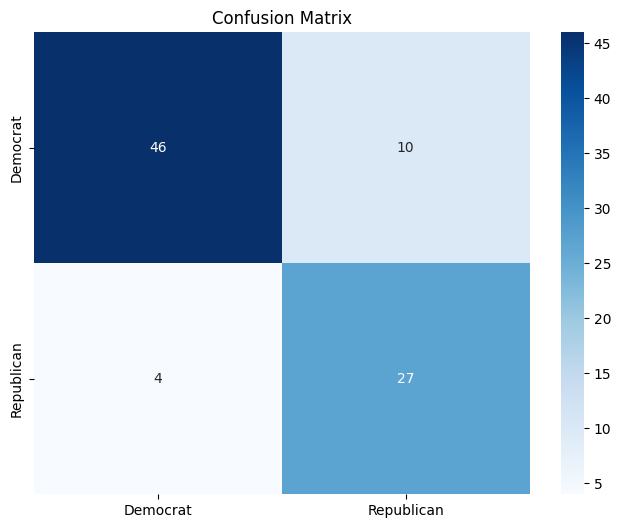

In [102]:
from sklearn.model_selection import learning_curve
import numpy as np

# Feature Scaling (keep your existing scaling code)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPClassifier (keep your existing configuration)
mlp = MLPClassifier(hidden_layer_sizes=(10),
                    activation='relu',
                    solver='adam',
                    max_iter=1000,
                    early_stopping=True,
                    validation_fraction=0.1,
                    n_iter_no_change=20,
                    random_state=1)

# Create learning curve data
train_sizes = np.linspace(0.1, 1.0, 5)  # Use 10%, 32.5%, 55%, 77.5%, 100% of training data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=mlp,
    X=X_train_scaled,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all available cores
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Learning Curve for MLPClassifier (10 Hidden Neurons)')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# The rest of your existing evaluation code can remain the same...
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

# Print metrics
print("\n" + "="*60)
print("MODEL PERFORMANCE METRICS".center(60))
print("="*60)
print(f"{'Accuracy:':<15}{accuracy_score(y_test, y_pred):.4f}")
print(f"{'Precision:':<15}{precision_score(y_test, y_pred):.4f}")
print(f"{'Recall:':<15}{recall_score(y_test, y_pred):.4f}")
print(f"{'F1-Score:':<15}{f1_score(y_test, y_pred):.4f}")
print("="*60 + "\n")

# Classification report and confusion matrix
print(classification_report(y_test, y_pred, target_names=["Democrat", "Republican"]))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Democrat", "Republican"],
            yticklabels=["Democrat", "Republican"])
plt.title("Confusion Matrix")
plt.show()



# K-means Clustering

K=2: Inertia=990.86, Silhouette Score=0.3470
K=3: Inertia=889.19, Silhouette Score=0.2517
K=4: Inertia=834.84, Silhouette Score=0.2124
K=5: Inertia=790.33, Silhouette Score=0.2010
K=6: Inertia=754.98, Silhouette Score=0.1798
K=7: Inertia=727.03, Silhouette Score=0.1394
K=8: Inertia=696.81, Silhouette Score=0.1409
K=9: Inertia=681.48, Silhouette Score=0.1350


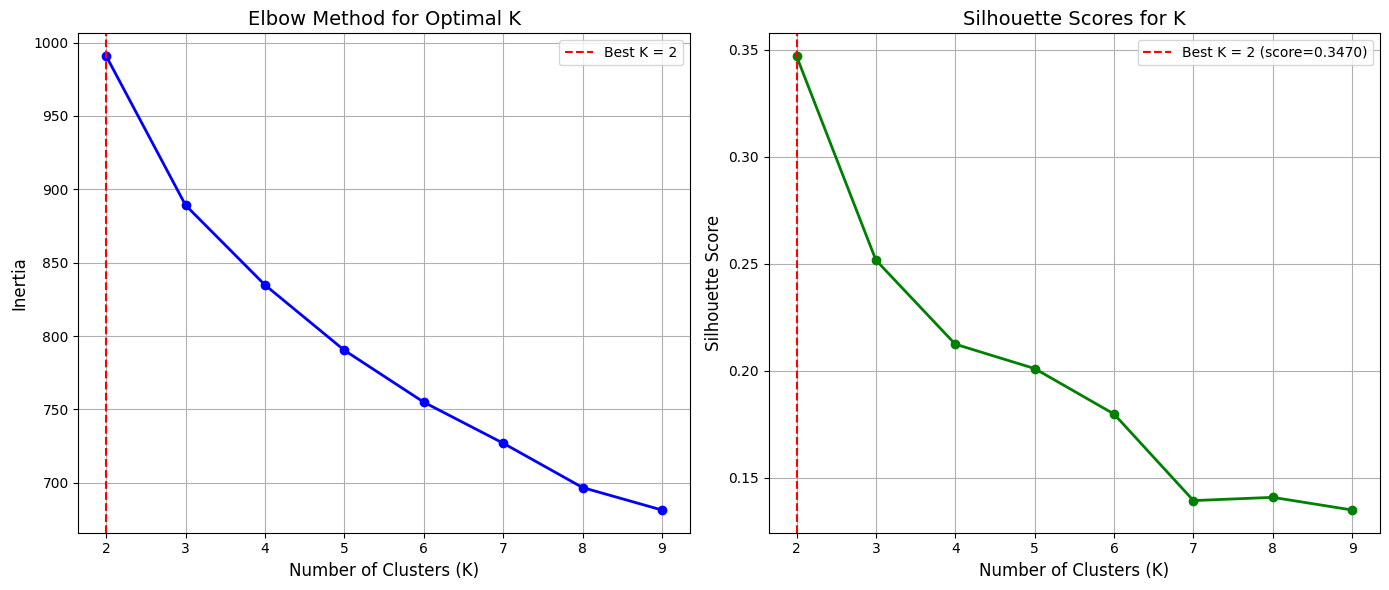


Silhouette Score: 0.3470
Adjusted Rand Index: 0.5779

Cluster vs Actual Party Distribution:
           Democrat  Republican
Cluster 0        41         157
Cluster 1       226          11
Clustering Accuracy (adjusted for label swap): 88.05%


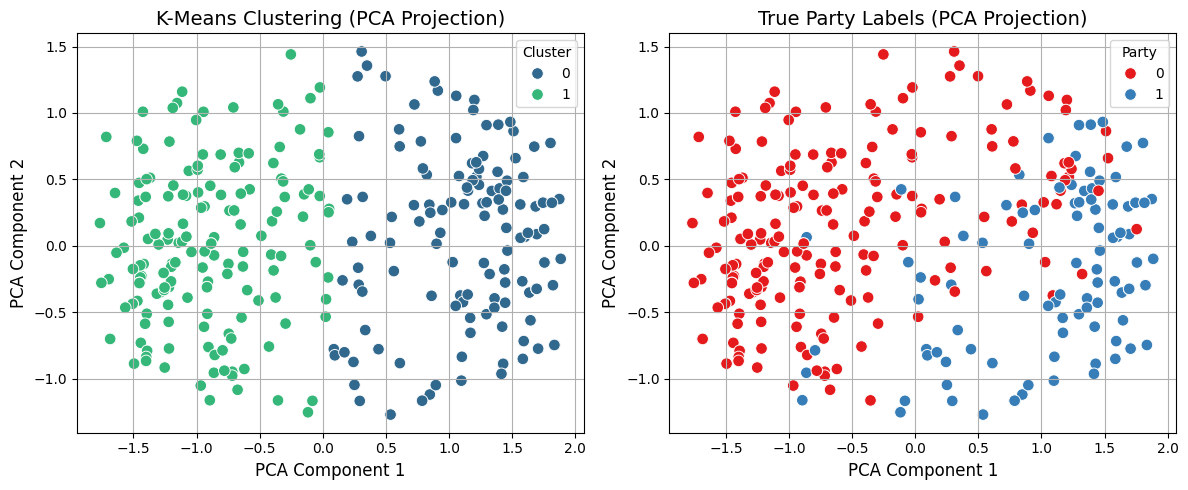


Top Features Differentiating the Clusters:
   Feature Index  Importance
4              4    0.859097
7              7    0.815561
3              3    0.810510
8              8    0.771577
2              2    0.733858

===== Clustering Summary =====
• Optimal K (from Silhouette): 2
• Silhouette Score: 0.3470
• Adjusted Rand Index: 0.5779
• Accuracy (w/ label flipping): 88.05%
• Moderate alignment — partisan but with some crossover votes.


In [103]:


# Elbow and Silhouette Analysis to find the optimal number of clusters
inertia = []              # List to store sum of squared distances (inertia) for each k
silhouette_scores = []    # List to store silhouette scores for each k
K_range = range(2, 10)    # Test cluster counts from 2 to 9

for k in K_range:
    # Initialize KMeans with k clusters and fixed random state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)  # Fit KMeans model on dataset

    clusters = kmeans.labels_  # Get cluster assignments for each sample

    inertia.append(kmeans.inertia_)  # Append inertia (sum of squared distances)

    # Calculate silhouette score for current clustering - measures cohesion and separation
    sil = silhouette_score(X, clusters)
    silhouette_scores.append(sil)

    # Print results for each k
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={sil:.4f}")

# Determine Best K from silhouette scores (max silhouette)
best_k_sil = K_range[np.argmax(silhouette_scores)]

# Plot Elbow and Silhouette Curves side-by-side
plt.figure(figsize=(14, 6))

# Plot inertia for elbow method
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-', linewidth=2)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.axvline(x=best_k_sil, color='r', linestyle='--', label=f'Best K = {best_k_sil}')
plt.grid(True)
plt.legend()

# Plot silhouette scores for different K values
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Scores for K', fontsize=14)
plt.axvline(x=best_k_sil, color='r', linestyle='--',
            label=f'Best K = {best_k_sil} (score={max(silhouette_scores):.4f})')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#Final Clustering using the optimal number of clusters
k_opt = best_k_sil
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)  # Predict clusters for the dataset

# Evaluate clustering quality
sil_score = silhouette_score(X, clusters)  # Compactness and separation metric
rand_index = adjusted_rand_score(y, clusters)  # Agreement with true labels (party)

print(f"\nSilhouette Score: {sil_score:.4f}")
print(f"Adjusted Rand Index: {rand_index:.4f}")

# Create confusion matrix between clusters and actual labels
conf_matrix = pd.crosstab(clusters, y, rownames=['Cluster'], colnames=['Actual Party'])
conf_matrix.columns = ['Democrat', 'Republican']
conf_matrix.index = [f'Cluster {i}' for i in range(k_opt)]

print("\nCluster vs Actual Party Distribution:")
print(conf_matrix)

# Calculate clustering accuracy accounting for possible label swapping
# Since cluster labels are arbitrary, max accuracy of cluster-label vs label or flipped label
accuracy = max(np.mean(clusters == y), np.mean(clusters == 1 - y))
print(f"Clustering Accuracy (adjusted for label swap): {accuracy:.2%}")

# Visualize clusters and true labels with PCA projection to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 5))

# Plot K-means clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=70)
plt.title("K-Means Clustering (PCA Projection)", fontsize=14)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.grid(True)
plt.legend(title="Cluster")

# Plot true party labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', s=70)
plt.title("True Party Labels (PCA Projection)", fontsize=14)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.grid(True)
plt.legend(title="Party")

plt.tight_layout()
plt.show()

# Calculate feature importance based on difference in cluster centers
centers = kmeans.cluster_centers_
feature_importance = np.abs(centers[0] - centers[1])  # Absolute difference for each feature

# Create a DataFrame to sort and show top features
feature_df = pd.DataFrame({
    'Feature Index': range(len(feature_importance)),
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nTop Features Differentiating the Clusters:")
print(feature_df.head(5))  # Show top 5 features

# Summary of clustering results and interpretation
print("\n===== Clustering Summary =====")
print(f"• Optimal K (from Silhouette): {k_opt}")
print(f"• Silhouette Score: {sil_score:.4f}")
print(f"• Adjusted Rand Index: {rand_index:.4f}")
print(f"• Accuracy (w/ label flipping): {accuracy:.2%}")

# Interpretation based on Adjusted Rand Index values
if rand_index > 0.7:
    print("• Strong alignment with party labels — clear partisan voting patterns.")
elif rand_index > 0.4:
    print("• Moderate alignment — partisan but with some crossover votes.")
else:
    print("• Weak alignment — likely more complex or nuanced voting behavior.")
